# **Initial Data Cleaning for Assistance Dataset**

In [1]:
# Import the following libraries:
# numpy
# pandas
# pandas-profiling
# matplotlib
# seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns# 

In [2]:
# read in the Assistance dataset

df = pd.read_csv('../../data/Assistance dataset_update2.csv')
df

,fips,state,county,snap_auth_stores_17,snap_auth_stores_chg_12_17,snap_bens_per_cap_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_17,school_lunch_prog_chg_12_17,school_bfast_prog_17,school_bfast_prog_chg_12_17,smr_food_prog_17,smr_food_prog_12_17,wic_parts_pop_17,wic_parts_pop_12_17,food_banks_18
0,1001,AL,Autauga,223185.67840,-25.958220,16.354677,-11.459878,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
1,1003,AL,Baldwin,157623.13360,-42.556016,11.479360,-27.760618,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
2,1005,AL,Barbour,257032.07890,-21.033857,29.122147,-6.408476,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
3,1007,AL,Bibb,227725.24510,-36.111921,17.557791,-21.739460,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
4,1009,AL,Blount,142860.82560,-37.813602,12.377973,-38.941463,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,106059.06570,-39.703860,5.694783,11.807223,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3139,56039,WY,Teton,29106.34375,-74.775282,0.436994,-56.549450,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3140,56041,WY,Uinta,132726.81250,-49.011216,8.465480,-14.706141,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3141,56043,WY,Washakie,86173.73918,-35.040672,6.882441,-21.414190,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0


In [3]:
# list of columns in df

df.columns

Index(['fips', 'state', 'county', 'snap_auth_stores_17',
       'snap_auth_stores_chg_12_17', 'snap_bens_per_cap_17',
       'snap_bens_per_cap_chg_12_17', 'school_lunch_prog_17',
       'school_lunch_prog_chg_12_17', 'school_bfast_prog_17',
       'school_bfast_prog_chg_12_17', 'smr_food_prog_17',
       'smr_food_prog_12_17', 'wic_parts_pop_17', 'wic_parts_pop_12_17',
       'food_banks_18'],
      dtype='object')

Information for the variables/column headings:

1. **fips** - Numbers which uniquely identify geographic areas; county-level FIPS codes have five digits of which the first two are the FIPS code of the state to which the county belongs
2. **state** - The two-character abbreviation of each state in the USA
3. **county** - A specified geographic area within a state
4. **snap_auth_stores_17** - SNAP (Supplemental Nutrition Assistance Program) redemptions/SNAP-authorized stores, 2017 (units=dollars/store)
5. **snap_auth_stores_chg_12_17** - SNAP redemptions/SNAP-authorized stores (% change), 2012-17
6. **snap_bens_per_cap_17** - SNAP benefits per capita, 2017 (units=dollars/capita)
7. **snap_bens_per_cap_chg_12_17** - SNAP benefits per capita (% change), 2012-17
8. **school_lunch_prog_17** - National School Lunch Program participants (% children), 2017
9. **school_lunch_prog_chg_12_17** - National School Lunch Program participants (change % children), 2012-17
10. **school_bfast_prog_17** - School Breakfast Program participants (% children), 2017
11. **school_bfast_prog_chg_12_17** - School Breakfast Program participants (change % children), 2012-17
12. **smr_food_prog_17** - Summer Food Service Program participants (% children), 2017
13. **smr_food_prog_12_17** - Summer Food Program participants (change % children), 2012-17
14. **wic_parts_pop_17** - WIC (Women, Infants, Children, supplemental program) participants (% pop), 2017
15. **wic_parts_pop_12_17** - WIC participants (change % pop), 2012-17
16. **food_banks_18** - Food Banks, 2018 (units=count)

In [4]:
# Rename a couple of the columns that veered from the desired pattern

df = df.rename(columns = {'smr_food_prog_12_17': 'smr_food_prog_chg_12_17', 'wic_parts_pop_12_17': 'wic_parts_pop_chg_12_17', 'snap_auth_stores_17': 'snap_redemp_auth_stores_17', 'snap_auth_stores_chg_12_17': 'snap_redemp_auth_stores_chg_12_17'})
df

,fips,state,county,snap_redemp_auth_stores_17,snap_redemp_auth_stores_chg_12_17,snap_bens_per_cap_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_17,school_lunch_prog_chg_12_17,school_bfast_prog_17,school_bfast_prog_chg_12_17,smr_food_prog_17,smr_food_prog_chg_12_17,wic_parts_pop_17,wic_parts_pop_chg_12_17,food_banks_18
0,1001,AL,Autauga,223185.67840,-25.958220,16.354677,-11.459878,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
1,1003,AL,Baldwin,157623.13360,-42.556016,11.479360,-27.760618,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
2,1005,AL,Barbour,257032.07890,-21.033857,29.122147,-6.408476,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
3,1007,AL,Bibb,227725.24510,-36.111921,17.557791,-21.739460,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
4,1009,AL,Blount,142860.82560,-37.813602,12.377973,-38.941463,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,106059.06570,-39.703860,5.694783,11.807223,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3139,56039,WY,Teton,29106.34375,-74.775282,0.436994,-56.549450,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3140,56041,WY,Uinta,132726.81250,-49.011216,8.465480,-14.706141,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0
3141,56043,WY,Washakie,86173.73918,-35.040672,6.882441,-21.414190,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0


In [5]:
# list of columns after update

df.columns

Index(['fips', 'state', 'county', 'snap_redemp_auth_stores_17',
       'snap_redemp_auth_stores_chg_12_17', 'snap_bens_per_cap_17',
       'snap_bens_per_cap_chg_12_17', 'school_lunch_prog_17',
       'school_lunch_prog_chg_12_17', 'school_bfast_prog_17',
       'school_bfast_prog_chg_12_17', 'smr_food_prog_17',
       'smr_food_prog_chg_12_17', 'wic_parts_pop_17',
       'wic_parts_pop_chg_12_17', 'food_banks_18'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fips                               3143 non-null   int64  
 1   state                              3143 non-null   object 
 2   county                             3143 non-null   object 
 3   snap_redemp_auth_stores_17         2895 non-null   float64
 4   snap_redemp_auth_stores_chg_12_17  2844 non-null   float64
 5   snap_bens_per_cap_17               3087 non-null   float64
 6   snap_bens_per_cap_chg_12_17        3087 non-null   float64
 7   school_lunch_prog_17               3143 non-null   float64
 8   school_lunch_prog_chg_12_17        3143 non-null   float64
 9   school_bfast_prog_17               3143 non-null   float64
 10  school_bfast_prog_chg_12_17        3143 non-null   float64
 11  smr_food_prog_17                   3143 non-null   float

In [7]:
# Protect original data by creating copy of df to work with

df_wip = df.copy()

In [8]:
# sourcing info, filling in empty cells with value=0

df_wip.snap_redemp_auth_stores_17.fillna(value=0, inplace=True)
df_wip.snap_redemp_auth_stores_chg_12_17.fillna(value=0, inplace=True)
df_wip.snap_bens_per_cap_17.fillna(value=0, inplace=True)
df_wip.snap_bens_per_cap_chg_12_17.fillna(value=0, inplace=True)
df_wip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fips                               3143 non-null   int64  
 1   state                              3143 non-null   object 
 2   county                             3143 non-null   object 
 3   snap_redemp_auth_stores_17         3143 non-null   float64
 4   snap_redemp_auth_stores_chg_12_17  3143 non-null   float64
 5   snap_bens_per_cap_17               3143 non-null   float64
 6   snap_bens_per_cap_chg_12_17        3143 non-null   float64
 7   school_lunch_prog_17               3143 non-null   float64
 8   school_lunch_prog_chg_12_17        3143 non-null   float64
 9   school_bfast_prog_17               3143 non-null   float64
 10  school_bfast_prog_chg_12_17        3143 non-null   float64
 11  smr_food_prog_17                   3143 non-null   float

In [9]:
# Shevaugn's use of regions was perfect so utilizing it here

regions_by_states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

In [10]:
# adding the region column

df_wip["region"] = df_wip["state"].map(regions_by_states)
df_wip

,fips,state,county,snap_redemp_auth_stores_17,snap_redemp_auth_stores_chg_12_17,snap_bens_per_cap_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_17,school_lunch_prog_chg_12_17,school_bfast_prog_17,school_bfast_prog_chg_12_17,smr_food_prog_17,smr_food_prog_chg_12_17,wic_parts_pop_17,wic_parts_pop_chg_12_17,food_banks_18,region
0,1001,AL,Autauga,223185.67840,-25.958220,16.354677,-11.459878,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0,S
1,1003,AL,Baldwin,157623.13360,-42.556016,11.479360,-27.760618,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0,S
2,1005,AL,Barbour,257032.07890,-21.033857,29.122147,-6.408476,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0,S
3,1007,AL,Bibb,227725.24510,-36.111921,17.557791,-21.739460,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0,S
4,1009,AL,Blount,142860.82560,-37.813602,12.377973,-38.941463,63.126590,-5.099454,33.475354,6.269026,6.369006,3.208686,2.543570,-0.404113,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,106059.06570,-39.703860,5.694783,11.807223,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0,W
3139,56039,WY,Teton,29106.34375,-74.775282,0.436994,-56.549450,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0,W
3140,56041,WY,Uinta,132726.81250,-49.011216,8.465480,-14.706141,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0,W
3141,56043,WY,Washakie,86173.73918,-35.040672,6.882441,-21.414190,49.458965,-9.712489,15.566447,-0.856224,4.578746,1.358607,1.753551,-0.431917,0,W


In [11]:
df_wip.describe()

,fips,snap_redemp_auth_stores_17,snap_redemp_auth_stores_chg_12_17,snap_bens_per_cap_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_17,school_lunch_prog_chg_12_17,school_bfast_prog_17,school_bfast_prog_chg_12_17,smr_food_prog_17,smr_food_prog_chg_12_17,wic_parts_pop_17,wic_parts_pop_chg_12_17,food_banks_18
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,30390.411709,179471.978180,-19.926158,15.878513,-18.107740,59.168157,-3.823589,28.204112,2.833967,4.899112,0.680725,2.142129,-0.540772,0.087814
std,15164.717720,111792.106709,23.701899,9.279993,17.338790,8.941700,1.882139,8.043902,2.785304,2.254617,1.844446,0.407813,0.191993,0.283070
min,1001.000000,0.000000,-90.288779,0.000000,-92.194893,40.200015,-9.712489,10.545776,-2.045403,1.035726,-31.389147,0.972890,-1.140727,0.000000
25%,18178.000000,99154.164655,-34.582484,9.310042,-28.893325,51.237761,-4.754380,22.819343,0.801454,3.349687,-0.392941,1.858326,-0.670760,0.000000
50%,29177.000000,177296.986700,-22.660580,14.621589,-19.676912,59.919623,-4.100326,25.093938,2.450589,4.802215,0.744200,2.126099,-0.500831,0.000000
75%,45082.000000,247769.872350,-6.418108,20.682810,-9.036334,65.763054,-3.017567,35.287909,4.134604,5.715970,1.559164,2.422094,-0.395677,0.000000
max,56045.000000,858017.806500,431.453632,103.595009,258.413147,77.526608,2.305527,56.544594,16.217745,20.811003,5.000077,2.903674,-0.196636,1.000000


In [13]:
# create two (2) separate data frames - 1. for change in benefits 2. for the benefits themselves

benefits_chg = df_wip[['fips', 'state', 'county', 'snap_redemp_auth_stores_chg_12_17', 'snap_bens_per_cap_chg_12_17', 'school_lunch_prog_chg_12_17','school_bfast_prog_chg_12_17', 'wic_parts_pop_chg_12_17','region' ]]
benefits = df_wip[['fips', 'state', 'county', 'snap_redemp_auth_stores_17', 'snap_bens_per_cap_17','school_lunch_prog_17', 'school_bfast_prog_17', 'smr_food_prog_17', 'wic_parts_pop_17', 'food_banks_18', 'region' ]]

In [14]:
# snapshot of the dataframe reflecting the changes in benefits for the various interventions

benefits_chg

,fips,state,county,snap_redemp_auth_stores_chg_12_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_chg_12_17,school_bfast_prog_chg_12_17,wic_parts_pop_chg_12_17,region
0,1001,AL,Autauga,-25.958220,-11.459878,-5.099454,6.269026,-0.404113,S
1,1003,AL,Baldwin,-42.556016,-27.760618,-5.099454,6.269026,-0.404113,S
2,1005,AL,Barbour,-21.033857,-6.408476,-5.099454,6.269026,-0.404113,S
3,1007,AL,Bibb,-36.111921,-21.739460,-5.099454,6.269026,-0.404113,S
4,1009,AL,Blount,-37.813602,-38.941463,-5.099454,6.269026,-0.404113,S
...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,-39.703860,11.807223,-9.712489,-0.856224,-0.431917,W
3139,56039,WY,Teton,-74.775282,-56.549450,-9.712489,-0.856224,-0.431917,W
3140,56041,WY,Uinta,-49.011216,-14.706141,-9.712489,-0.856224,-0.431917,W
3141,56043,WY,Washakie,-35.040672,-21.414190,-9.712489,-0.856224,-0.431917,W


In [15]:
benefits_chg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fips                               3143 non-null   int64  
 1   state                              3143 non-null   object 
 2   county                             3143 non-null   object 
 3   snap_redemp_auth_stores_chg_12_17  3143 non-null   float64
 4   snap_bens_per_cap_chg_12_17        3143 non-null   float64
 5   school_lunch_prog_chg_12_17        3143 non-null   float64
 6   school_bfast_prog_chg_12_17        3143 non-null   float64
 7   wic_parts_pop_chg_12_17            3143 non-null   float64
 8   region                             3143 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 221.1+ KB


In [16]:
# snapshot of the dataframe reflecting the various interventions/benefits

benefits

,fips,state,county,snap_redemp_auth_stores_17,snap_bens_per_cap_17,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,food_banks_18,region
0,1001,AL,Autauga,223185.67840,16.354677,63.126590,33.475354,6.369006,2.543570,0,S
1,1003,AL,Baldwin,157623.13360,11.479360,63.126590,33.475354,6.369006,2.543570,0,S
2,1005,AL,Barbour,257032.07890,29.122147,63.126590,33.475354,6.369006,2.543570,0,S
3,1007,AL,Bibb,227725.24510,17.557791,63.126590,33.475354,6.369006,2.543570,0,S
4,1009,AL,Blount,142860.82560,12.377973,63.126590,33.475354,6.369006,2.543570,0,S
...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,106059.06570,5.694783,49.458965,15.566447,4.578746,1.753551,0,W
3139,56039,WY,Teton,29106.34375,0.436994,49.458965,15.566447,4.578746,1.753551,0,W
3140,56041,WY,Uinta,132726.81250,8.465480,49.458965,15.566447,4.578746,1.753551,0,W
3141,56043,WY,Washakie,86173.73918,6.882441,49.458965,15.566447,4.578746,1.753551,0,W


In [17]:
benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fips                        3143 non-null   int64  
 1   state                       3143 non-null   object 
 2   county                      3143 non-null   object 
 3   snap_redemp_auth_stores_17  3143 non-null   float64
 4   snap_bens_per_cap_17        3143 non-null   float64
 5   school_lunch_prog_17        3143 non-null   float64
 6   school_bfast_prog_17        3143 non-null   float64
 7   smr_food_prog_17            3143 non-null   float64
 8   wic_parts_pop_17            3143 non-null   float64
 9   food_banks_18               3143 non-null   int64  
 10  region                      3143 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 270.2+ KB


In [18]:
# grouping by region to then plot/graph benefit changes

region_benefits_chg = benefits_chg.groupby('region').mean()
region_benefits_chg

,fips,snap_redemp_auth_stores_chg_12_17,snap_bens_per_cap_chg_12_17,school_lunch_prog_chg_12_17,school_bfast_prog_chg_12_17,wic_parts_pop_chg_12_17
region,,,,,,
M,29098.939704,-25.527803,-22.876387,-3.836241,2.436359,-0.464588
N,34398.775510,-17.243102,-15.490904,-1.732839,4.637149,-0.350311
O,4043.441176,0.390340,-8.041199,-0.650787,3.690058,-0.932971
S,32289.460932,-18.014699,-17.290326,-4.247586,2.929599,-0.602695
W,27678.171186,-18.385056,-14.602722,-3.853271,2.402111,-0.564352


In [19]:
# grouping by region to then plot/graph benefit changes

region_benefits = benefits.groupby('region').mean()
region_benefits

,fips,snap_redemp_auth_stores_17,snap_bens_per_cap_17,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,food_banks_18
region,,,,,,,,
M,29098.939704,142287.202052,11.736447,61.706395,22.667369,4.540380,1.900998,0.056883
N,34398.775510,203665.513964,14.543749,51.216648,22.954394,7.903177,1.838773,0.183673
O,4043.441176,221916.026830,27.314442,41.697439,19.665242,3.636848,2.373645,0.235294
S,32289.460932,201351.853850,19.250530,62.451206,34.970985,4.955414,2.379915,0.064516
W,27678.171186,170645.669256,13.971916,51.932834,23.125319,4.125732,2.051780,0.140678


Text(0, 0.5, 'USD Per Benefit Recipient')

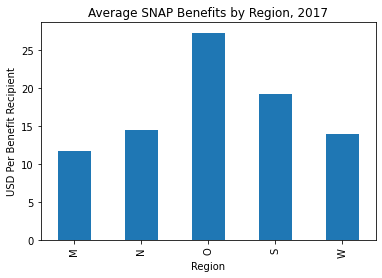

In [20]:
# create bar graph

snap_benefits_per_capita = region_benefits['snap_bens_per_cap_17'].plot.bar()

# graph labels

snap_benefits_per_capita.set_title('Average SNAP Benefits by Region, 2017')
snap_benefits_per_capita.set_xlabel('Region')
snap_benefits_per_capita.set_ylabel("USD Per Benefit Recipient")

Hawaii and Alaska are the states that fall into the 'O' region so it is interesting to find that they have the highest SNAP benefits per recipient, with the 'S' in second place.

Text(0, 0.5, 'Percent')

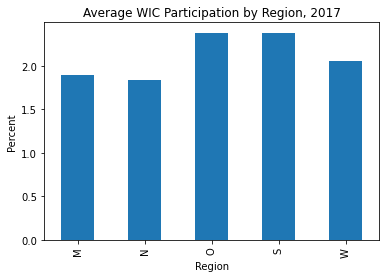

In [21]:
# create bar graph

wic_participants_percent_pop = region_benefits['wic_parts_pop_17'].plot.bar()

# graph labels

wic_participants_percent_pop.set_title('Average WIC Participation by Region, 2017')
wic_participants_percent_pop.set_xlabel('Region')
wic_participants_percent_pop.set_ylabel("Percent")

'O' region and 'S' region are in a tie for WIC participants per percentage of their population.

Text(0, 0.5, 'USD Redeemed per Store')

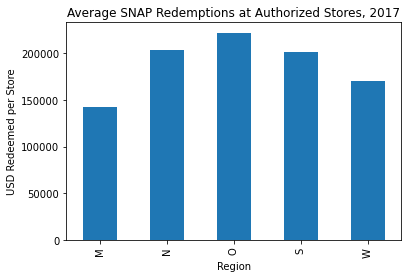

In [22]:
# create bar graph

snap_stores = region_benefits['snap_redemp_auth_stores_17'].plot.bar()

# graph labels

snap_stores.set_title('Average SNAP Redemptions at Authorized Stores, 2017')
snap_stores.set_xlabel('Region')
snap_stores.set_ylabel("USD Redeemed per Store")

Not much commentary here. Perhaps something of interest when we look at the percentage change.

Text(0, 0.5, 'Percentage Change')

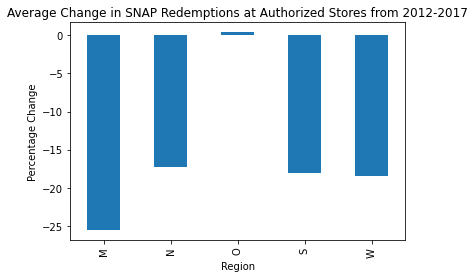

In [23]:
# create bar graph

snap_stores_chg = region_benefits_chg['snap_redemp_auth_stores_chg_12_17'].plot.bar()

# graph labels

snap_stores_chg.set_title('Average Change in SNAP Redemptions at Authorized Stores from 2012-2017')
snap_stores_chg.set_xlabel('Region')
snap_stores_chg.set_ylabel("Percentage Change")

**This is significant.** There has been a decrease in the amount of SNAP dollars are being redeemed at SNAP authorized stores during the five years leading up to 2017. Could be interesting to see if this correlates to any other decrease or increase in SNAP benefits.

Text(0, 0.5, 'Percentage Change')

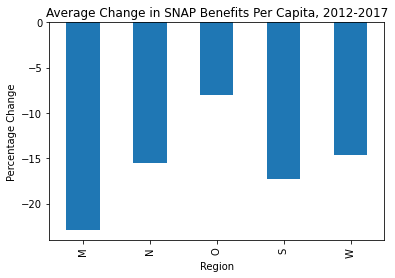

In [25]:
# create bar graph

snap_bens_per_capita_chg = region_benefits_chg['snap_bens_per_cap_chg_12_17'].plot.bar()

# graph labels

snap_bens_per_capita_chg.set_title('Average Change in SNAP Benefits Per Capita, 2012-2017')
snap_bens_per_capita_chg.set_xlabel('Region')
snap_bens_per_capita_chg.set_ylabel("Percentage Change")

There appears to be a possible correlation to the significant decrease of SNAP dollars being redeemed to the reduced amount of SNAP benefits. With a review against food insecurity, it may be possible to see if this is linked to a greater chance of food insecurity.

Text(0, 0.5, 'Percentage Change')

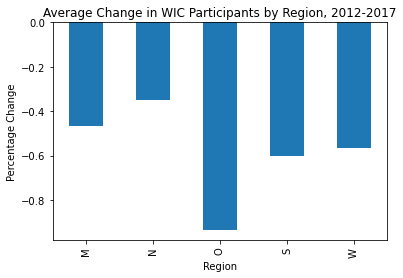

In [26]:
# create bar graph

wic_participants_pop_chg = region_benefits_chg['wic_parts_pop_chg_12_17'].plot.bar()

# graph labels

wic_participants_pop_chg.set_title('Average Change in WIC Participants by Region, 2012-2017')
wic_participants_pop_chg.set_xlabel('Region')
wic_participants_pop_chg.set_ylabel("Percentage Change")

Another examplf of reduced benefits that could possibly correlate to food insecurity.